### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)
    

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.

Some code inspiration for this analysis was sourced from [this noteboook](https://www.kaggle.com/dimitriirfan/market-eda).

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. 

In [1]:
# sets up matplotlib with interactive features
%matplotlib notebook

# Import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# Load marketing data set 
marketing_data = pd.read_csv("marketing_data.csv")

# Get to know the data set
marketing_data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


#### Data Information <a class="anchor" id="section1_2"></a>

* There are 28 columns and 2240 rows.
* Most values are integers in this dataset.
* The `income` column has 24 missing data. values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [3]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
# Income is only row with null value
marketing_data.Income.isnull().sum()

24

In [5]:
# Basic summary statistics
marketing_data.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

In [6]:
# Clean Income Column

#taking dollar sign out of values and convert to float
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# summary stats
marketing_data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Using `re.sub` function from the `re` (regular expression) module in Python to rename all of the columns name to snake case format

* `(?<!^)` : Negative lookbehind assertion. Ensures that the match is not at the beginning of the string.
* `(?=[A-Z])` : Positive lookahead assertion. Ensures that the match is followed by an uppercase letter.

In [11]:
# put all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]

# Check out new names of columns
marketing_data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

<IPython.core.display.Javascript object>


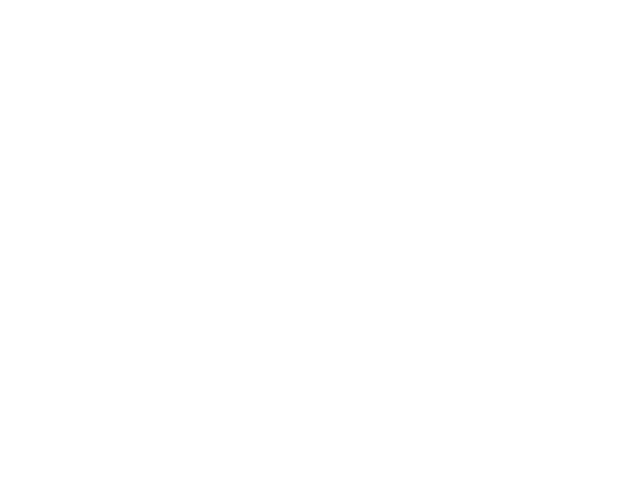

In [18]:
# Check for Income outliar
plt.figure()
sns.boxplot(marketing_data["income"])

plt.show()
plt.clf()

We have an aoutliar in income column so we should take it out

In [13]:
# remove incomes below 200000
marketing_data = marketing_data[marketing_data['income'] < 200000]

marketing_data['income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

<IPython.core.display.Javascript object>


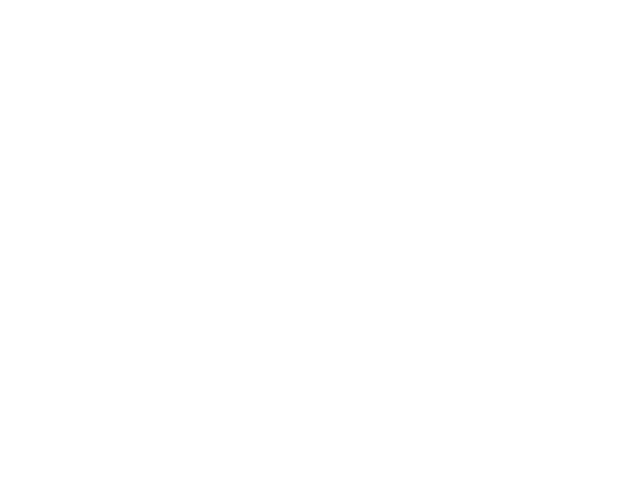

In [19]:
# Check for Income outliar
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()
plt.clf()

The missing values are replaced with the mean income.

In [15]:
# replace missing values with the mean income
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis.

<IPython.core.display.Javascript object>


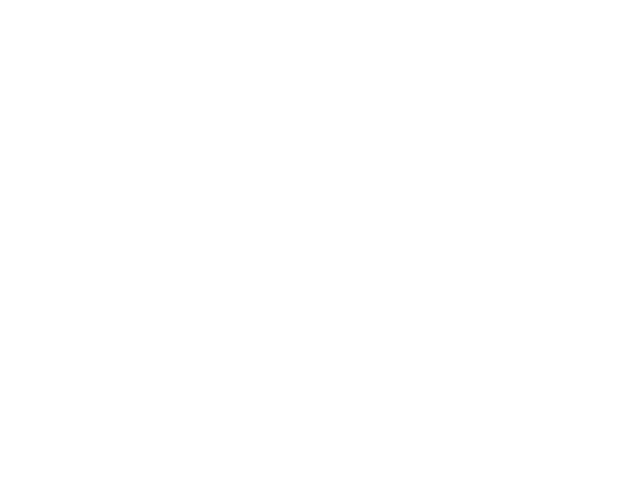

In [20]:
# A new column called age is made by subracting each value of year_birth from 2024
marketing_data['age'] = 2024 - marketing_data['year_birth']

# Check for age outliar
plt.figure()
sns.boxplot(marketing_data['age'])
plt.show()
plt.clf()

We have an aoutliar in age column so we should take it out

In [ ]:
# Clean age column from outliars
marketing_data = marketing_data[marketing_data['age'] < 100]

# Check for age outliar
plt.figure()
sns.boxplot(marketing_data['age'])
plt.show()
plt.clf()

In [ ]:
marketing_data["age"].describe()

#### Checking the Education Variable <a class="anchor" id="section2_2"></a>

In [ ]:
plt.figure()
sns.boxplot(x = marketing_data["education"], y=marketing_data["income"], 
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()
plt.clf()

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`
* `country`
* `maritalStatus`



The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products` 
---
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`


Through statistics and visualizations the following question can be answered:

* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 
* Does a shopper's country, maritalStatus relate to their purchasing behavior? 
* Does a complains relate to recency?
* Does a shopper's num_web_visits_month relate to their overall purchasing? 


#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution.

In [ ]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

This overview shows that the purchase behavior columns are all skewed to the right.

In [ ]:
marketing_data.corr()

Correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

In [ ]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()
plt.clf()

#### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable.

In [ ]:
# Make list of amount and purchase for visualize
marketing_amount = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']
marketing_purchase = ['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=len(marketing_purchase), ncols=1, figsize=(6, 4 * len(marketing_purchase)))

# Loop through each marketing purchase variable
for i, purchase in enumerate(marketing_purchase):
    # Plot scatterplot with hue
    sns.scatterplot(data=marketing_data, x="income", y=purchase, hue="education", ax=axes[i], palette="viridis")
    axes[i].set_title(f'{purchase[4:]} vs Income')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)
    axes[i].legend(title="Education", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()

 `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

In [ ]:
# To get a better look at the linear relationships, regplot() was used.
fig, axes = plt.subplots(nrows=1, ncols=len(marketing_purchase), figsize=(4 * len(marketing_purchase), 4))

# Loop through each marketing purchase variable
for i, purchase in enumerate(marketing_purchase):
    # Plot regression plot for each subplot
    sns.regplot(data=marketing_data, x="income", y=purchase, ax=axes[i], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axes[i].set_title("Purchase Behavior by income")
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [ ]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]

In [ ]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
                hue=marketing_data['country'], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()
plt.clf()

In [ ]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.clf()

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the `education` and `total_purchases` as the points are scattered randomly across the plot.

#### More Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. This analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each marketing amount variable
for i, amount in enumerate(marketing_amount):
    # Plot scatter plot for each subplot with hue of education
    sns.scatterplot(data=marketing_data, x="income", y=amount, ax=axes[i], hue="education", palette="Set2")
    axes[i].set_title(f'{amount[4:]} and incomes')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(amount)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()

There is an fairly strong linear, positive relationship between the variables across the board. It is still hard to see how education plays a role, however.

#### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

In [ ]:
# dictionary used to contain dynamic variables
variable_names = {}

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", marketing_amount[i])
plt.show()
plt.clf()

In [ ]:
# Dictionary used to contain dynamic variables
variable_names = {}

for i in range(6):
    # Defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # Mapping the facet grid with regplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.regplot, "income", amounts_list[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    

plt.show()
plt.clf()

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
* `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

#### Purchasing Behavior by Age <a class="anchor" id="section3_5"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`


In [ ]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["age"], 
                hue=marketing_data['country'], palette="viridis")
plt.title("Purchase Behavior by age")
plt.show()
plt.clf()

It is hard to see any relationship between `age` and `total_purchases` in this plot.

In [ ]:
# dictionary used to contain dynamic variables
variable_names = {}

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "age", marketing_amount[i])
plt.show()
plt.clf()

In [ ]:
# dictionary used to contain dynamic variables
variable_names = {}

for i in range(len(marketing_purchase)):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "age", marketing_purchase[i])
plt.show()
plt.clf()

It is also difficult to decipher any pattern between `age` and any amount and purchases in any of these plots. Because of this, a different analysis strategy will be used on the `age` variable.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

In [ ]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['age'].apply(age_groups)

In [ ]:
# Convert 'age_group' to a categorical type with the specified order
age_order = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']
marketing_data['age_group'] = pd.Categorical(marketing_data['age_group'], categories=age_order, ordered=True)

# Plotting the age Group variable in a bar chart
plt.figure()
sns.countplot(x='age_group', data=marketing_data)
plt.show()

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping at the store.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [ ]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()


In [ ]:
print(age_plus_amounts)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if `age_group` affects how many items customers buy each time. 

In [ ]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

#### Purchasing Behavior by Martial Status <a class="anchor" id="section3_6"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`


In [ ]:
# Make list of amount and purchase for visualize
marketing_amount = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']
marketing_purchase = ['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']

In [ ]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(marketing_data["marital_status"], marketing_data["total_purchases"], color='blueviolet')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Marital Status')
plt.show()

In [ ]:
# Melt the DataFrame to have a 'variable' column for marketing purchase types
melted_data = marketing_data.melt(id_vars=['marital_status'], value_vars=marketing_purchase, var_name='purchase_type', value_name='total_purchases')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='marital_status', y='total_purchases', hue='purchase_type', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Marital Status and Marketing Purchase Type')
plt.legend(title='Marketing Purchase Type', loc='upper right')
plt.show()
plt.clf()

In [ ]:
# Melt the DataFrame to have a 'variable' column for product categories
melted_data = marketing_data.melt(id_vars=['marital_status'], value_vars=marketing_amount, var_name='product', value_name='total_purchases')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='marital_status', y='total_purchases', hue='product', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Marital Status and Product Category')
plt.legend(title='Product Category', loc='upper right')
plt.show()
plt.clf()

#### Purchasing Behavior by Country <a class="anchor" id="section3_6"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`


In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(marketing_data["country"], marketing_data["total_purchases"], color='cyan')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Country')

plt.show()

In [ ]:
# Melt the DataFrame to have a 'variable' column for marketing purchase types
melted_data = marketing_data.melt(id_vars=['country'], value_vars=marketing_purchase, var_name='purchase_type', value_name='total_purchases')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='total_purchases', hue='purchase_type', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Country and Marketing Purchase Type')
plt.legend(title='Marketing Purchase Type', loc='upper right')
plt.show()
plt.clf()

In [ ]:
# Melt the DataFrame to have a 'variable' column for product categories
melted_data = marketing_data.melt(id_vars=['country'], value_vars=marketing_amount, var_name='product', value_name='total_purchases')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='total_purchases', hue='product', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Country and Product Category')
plt.legend(title='Product Category', loc='upper right')
plt.show()
plt.clf()

#### Purchasing Behavior by kid at home <a class="anchor" id="section3_6"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`


In [ ]:
# Melt the DataFrame to have a 'variable' column for marketing purchase types
melted_data = marketing_data.melt(id_vars=['kidhome'], value_vars=marketing_purchase, var_name='purchase_type', value_name='total_purchases')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='kidhome', y='total_purchases', hue='purchase_type', data=melted_data)
plt.xlabel('kid at Home')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by kid at Home')
plt.legend(title='Marketing Purchase Type', loc='upper right')
plt.show()
plt.clf()

#### Purchasing Behavior by teen at home <a class="anchor" id="section3_6"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`


In [ ]:
# Melt the DataFrame to have a 'variable' column for product categories
melted_data = marketing_data.melt(id_vars=['teenhome'], value_vars=marketing_amount, var_name='product', value_name='total_purchases')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='teenhome', y='total_purchases', hue='product', data=melted_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Country and Product Category')
plt.legend(title='Product Category', loc='upper right')
plt.show()
plt.clf()

### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 